### So, before we start to work with images, let's overview our data.

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

Read data

In [2]:
df = pd.read_csv('../data/train.csv')
df.head(5)

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7254 entries, 0 to 7253
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           7254 non-null   object
 1   Genre        7254 non-null   object
 2   Action       7254 non-null   int64 
 3   Adventure    7254 non-null   int64 
 4   Animation    7254 non-null   int64 
 5   Biography    7254 non-null   int64 
 6   Comedy       7254 non-null   int64 
 7   Crime        7254 non-null   int64 
 8   Documentary  7254 non-null   int64 
 9   Drama        7254 non-null   int64 
 10  Family       7254 non-null   int64 
 11  Fantasy      7254 non-null   int64 
 12  History      7254 non-null   int64 
 13  Horror       7254 non-null   int64 
 14  Music        7254 non-null   int64 
 15  Musical      7254 non-null   int64 
 16  Mystery      7254 non-null   int64 
 17  N/A          7254 non-null   int64 
 18  News         7254 non-null   int64 
 19  Reality-TV   7254 non-null 

In [4]:
np.shape(df)

(7254, 27)

### Check for empty values

In [5]:
df.isna().sum()

Id             0
Genre          0
Action         0
Adventure      0
Animation      0
Biography      0
Comedy         0
Crime          0
Documentary    0
Drama          0
Family         0
Fantasy        0
History        0
Horror         0
Music          0
Musical        0
Mystery        0
N/A            0
News           0
Reality-TV     0
Romance        0
Sci-Fi         0
Short          0
Sport          0
Thriller       0
War            0
Western        0
dtype: int64

### Check for duplicates

In [6]:
np.shape(df[df.duplicated(keep=False)])

(24, 27)

Drop them

In [7]:
df.drop_duplicates(inplace = True)

In [8]:
np.shape(df)

(7242, 27)

### Check for nonsensical or rarely presented columns

In [9]:
features = list(
    set(df.columns)
    - {
        "Id",
        "Genre",
    }
)

In [10]:
from collections import OrderedDict

In [11]:
def get_features_and_count(features, df):
    d = dict.fromkeys(features, 0)
    for g in features:
        d[g] = sum(df[g].tolist())
    d = OrderedDict(sorted(d.items(), key=lambda kv: kv[1], reverse=True))
    return d

In [12]:
g_and_count = get_features_and_count(features,df)

In [13]:
g_and_count

OrderedDict([('Drama', 3617),
             ('Comedy', 2895),
             ('Action', 1339),
             ('Romance', 1331),
             ('Crime', 1175),
             ('Thriller', 916),
             ('Adventure', 868),
             ('Documentary', 650),
             ('Horror', 502),
             ('Fantasy', 467),
             ('Mystery', 453),
             ('Biography', 441),
             ('Family', 434),
             ('Sci-Fi', 397),
             ('Music', 304),
             ('Animation', 244),
             ('History', 224),
             ('Sport', 219),
             ('War', 144),
             ('Musical', 97),
             ('Western', 50),
             ('Short', 46),
             ('News', 21),
             ('N/A', 9),
             ('Reality-TV', 2)])

In [14]:
sum(g_and_count.values())

16845

In [15]:
def drop_genre_by_count(gc_dict, df, t_hold, inpl = False):
    if inpl == True:
        df.drop([g for g in gc_dict if gc_dict[g] < t_hold], axis=1, inplace=True)
    else:
        return df.drop([g for g in gc_dict if gc_dict[g] < t_hold], axis=1, inplace=False)

In [16]:
df.columns

Index(['Id', 'Genre', 'Action', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'History', 'Horror', 'Music', 'Musical', 'Mystery', 'N/A', 'News',
       'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War',
       'Western'],
      dtype='object')

In [17]:
drop_genre_by_count(g_and_count, df, 10, True)
df.columns

Index(['Id', 'Genre', 'Action', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News', 'Romance',
       'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War', 'Western'],
      dtype='object')

In [18]:
len(df.columns)

25

### Check for movies without genres

In [19]:
np.shape(df[df["Genre"].map(lambda lst: lst == "['N/A']")])

(9, 25)

In [20]:
features2 = list(
    set(df.columns)
    - {
        "Id",
        "Genre",
    }
)

In [21]:
null_genres_ix = [i for i in range(len(df)) if sum(np.array(df[features2].iloc[[i]])[0]) == 0]

In [22]:
null_genres_ix

[3300, 3308, 3526, 3777, 4023, 4628, 4862, 5166, 6859, 7181]

In [23]:
df.iloc[null_genres_ix]

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,Musical,Mystery,News,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
3304,tt0116748,['N/A'],0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3312,tt0289456,['N/A'],0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3531,tt0282965,['N/A'],0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3783,tt0322650,['N/A'],0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4029,tt0402398,['N/A'],0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4635,tt0468580,['N/A'],0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4870,tt2546300,['N/A'],0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5174,tt2546294,['N/A'],0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6870,tt2884170,['Reality-TV'],0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7192,tt3521442,['N/A'],0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Drop them

In [24]:
df.drop(df.index[null_genres_ix], inplace = True)

In [25]:
np.shape(df)

(7232, 25)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7232 entries, 0 to 7253
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           7232 non-null   object
 1   Genre        7232 non-null   object
 2   Action       7232 non-null   int64 
 3   Adventure    7232 non-null   int64 
 4   Animation    7232 non-null   int64 
 5   Biography    7232 non-null   int64 
 6   Comedy       7232 non-null   int64 
 7   Crime        7232 non-null   int64 
 8   Documentary  7232 non-null   int64 
 9   Drama        7232 non-null   int64 
 10  Family       7232 non-null   int64 
 11  Fantasy      7232 non-null   int64 
 12  History      7232 non-null   int64 
 13  Horror       7232 non-null   int64 
 14  Music        7232 non-null   int64 
 15  Musical      7232 non-null   int64 
 16  Mystery      7232 non-null   int64 
 17  News         7232 non-null   int64 
 18  Romance      7232 non-null   int64 
 19  Sci-Fi       7232 non-null 

### Check for non-numerical values in the id columns

In [27]:
df[df["Id"].map(lambda i: not i[2:].isnumeric())]

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,Musical,Mystery,News,Romance,Sci-Fi,Short,Sport,Thriller,War,Western


### Count of movies by genre 

In [28]:
g_and_count = get_features_and_count(features2,df)

F:\anaconda3\envs\crp3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


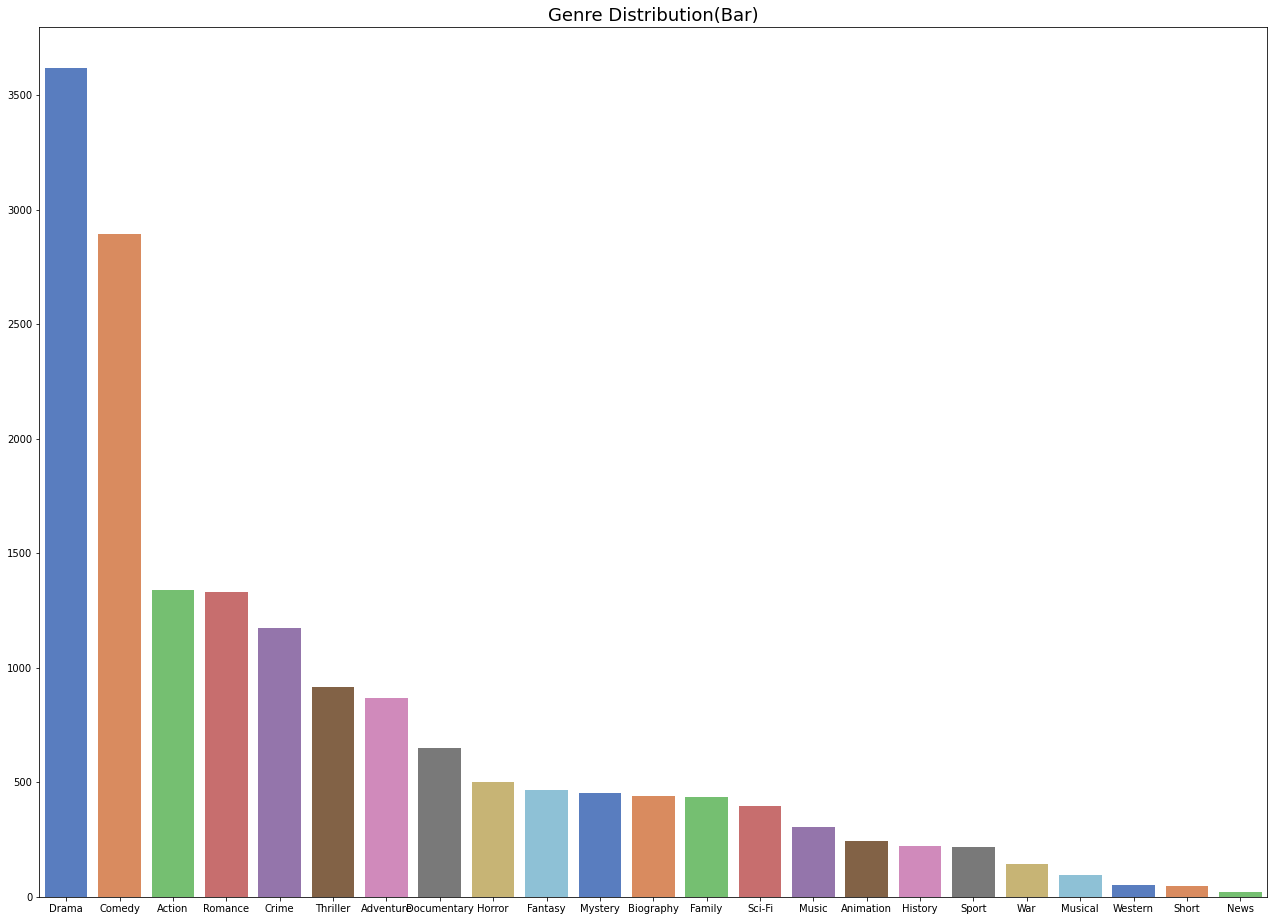

In [32]:
plt.figure(figsize=(22, 16))
pd = sns.barplot(list(g_and_count.keys()), list(g_and_count.values()), palette=("muted"))
pd.set_title("Genre Distribution(Bar)", fontsize=18)
plt.savefig('../visualisation/genre_distr_bar.png')

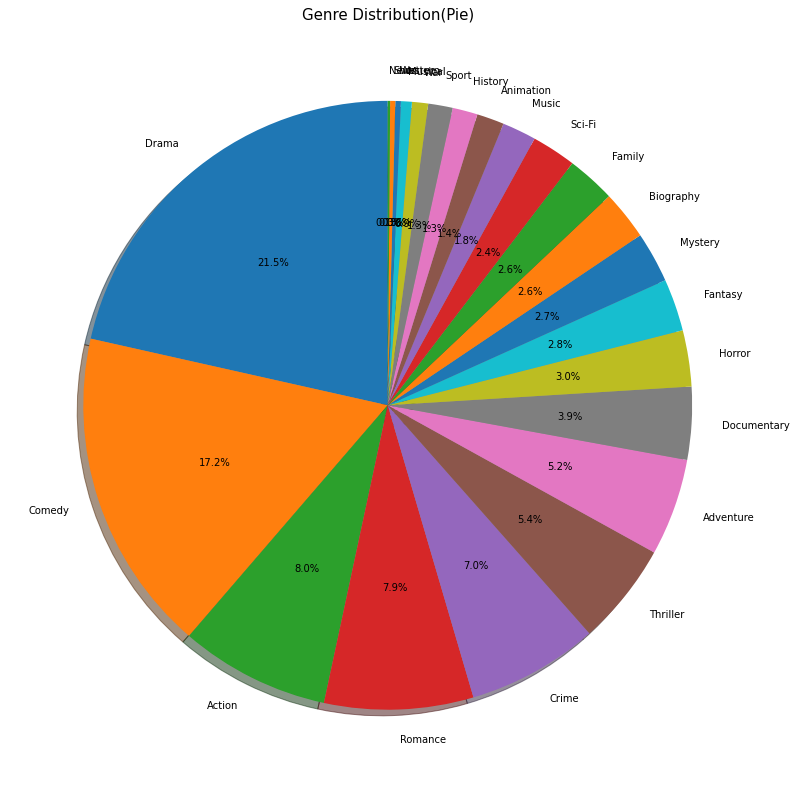

In [33]:
plt.figure(figsize=(22, 14))
plt.pie(list(g_and_count.values()), labels=list(g_and_count.keys()), autopct='%1.1f%%',
        shadow=True, startangle=90)

plt.title('Genre Distribution(Pie)', fontsize=15)
plt.savefig('../visualisation/genre_distr_pie.png')